In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import squarify


In [170]:
funding_data = pd.read_csv('/home/amisha/startup_funding.csv')



In [171]:
funding_data

,SNo,Collateral,StartupName,IndustryVertical,SubVertical,CityLocation,Scheme Opted,InvestmentType,Yearly Salary,Source of grants
0,0,yes,TouchKin,Technology,Predictive Care Platform,Bangalore,\nSupport for International Patent Protection ...,Private Equity,130000,central
1,1,no,Ethinos,Technology,Digital Marketing Agency,Mumbai,Software Technology Park (STP) Scheme,Private Equity,50000,state
2,2,no,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,\nSupport for International Patent Protection ...,Seed Funding,343000,state
3,3,yes,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,SIDBI,Seed Funding,50000,central
4,4,no,Click2Clinic,Agriculture,Dairy Entrepreneurship Development Scheme,Hyderabad,The incentives differ with respect to the cost...,Seed Funding,850000,state
5,5,no,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Software Technology Park (STP) Scheme,Seed Funding,100000,central
6,6,no,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,Atal Tinkering Laboratories,Private Equity,260000,state
7,7,no,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,Software Technology Park (STP) Scheme,Private Equity,200000,central
8,8,yes,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,Software Technology Park (STP) Scheme,Private Equity,8500000,state
9,9,yes,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,Software Technology Park (STP) Scheme,Private Equity,120000,central


In [172]:
X = funding_data.iloc[:, 4].values
y = funding_data.iloc[:, 6].values


In [140]:
# categorical data
#from sklearn.preprocessing import  OneHotEncoder
#labelencoder_X= LabelEncoder()
#X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
#onehotencoder=OneHotEncoder(categorical_features=[0])
#X[:, 3] = onehotencoder.fit_transform(X).toarray()


In [173]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [174]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder_X=LabelEncoder()
#X[:, 4]=labelencoder_X.fit_transform(X[:, 4])

cleanup_nums = {"IndustryVertical":     {"Consumer Internet": 0, "Technology": 1,"eCommerce": 2,"Agriculture": 3,"Logistics": 4,"Others": 5,"Food & Beverage": 6}}
                
                        

In [176]:
funding_data.replace(cleanup_nums, inplace=True)
funding_data.head()

,SNo,Collateral,StartupName,IndustryVertical,SubVertical,CityLocation,Scheme Opted,InvestmentType,Yearly Salary,Source of grants
0,0,yes,TouchKin,1,Predictive Care Platform,Bangalore,\nSupport for International Patent Protection ...,Private Equity,130000,central
1,1,no,Ethinos,1,Digital Marketing Agency,Mumbai,Software Technology Park (STP) Scheme,Private Equity,50000,state
2,2,no,Leverage Edu,0,Online platform for Higher Education Services,New Delhi,\nSupport for International Patent Protection ...,Seed Funding,343000,state
3,3,yes,Zepo,0,DIY Ecommerce platform,Mumbai,SIDBI,Seed Funding,50000,central
4,4,no,Click2Clinic,3,Dairy Entrepreneurship Development Scheme,Hyderabad,The incentives differ with respect to the cost...,Seed Funding,850000,state


In [178]:
funding_data.groupby('Scheme Opted')['Yearly Salary'].mean().sort_values(ascending=False).head()

Scheme Opted
Falcon Edge Capital,¬¨√ù Capital Advisers                              104500000
Clairvest Group                                                         73700000
Naspers                                                                 71000000
Vy Capital, SAIF Partners, Accel Partner, Bessemer Venture Partners     21000000
Accel Partners, Nandan Nilekani,                                        10000000
Name: Yearly Salary, dtype: int64

In [179]:
funding_data.groupby('Scheme Opted')['Yearly Salary'].mean().sort_values(ascending=False).head(10)

Scheme Opted
Falcon Edge Capital,¬¨√ù Capital Advisers                              104500000
Clairvest Group                                                         73700000
Naspers                                                                 71000000
Vy Capital, SAIF Partners, Accel Partner, Bessemer Venture Partners     21000000
Accel Partners, Nandan Nilekani,                                        10000000
International Finance Corporation                                       10000000
Yes Bank                                                                 7800000
InnoVen Capital                                                          7700000
Software Technology Park (STP) Scheme                                    5954166
BLIP Initiatives                                                         4000000
Name: Yearly Salary, dtype: int64

In [180]:
funding_data.groupby('Scheme Opted')['Yearly Salary'].count().sort_values(ascending=False).head(10)

Scheme Opted
EDF Policy                                                                                       17
Software Technology Park (STP) Scheme                                                            15
Support for International Patent Protection in Electronics & Information Technology (SIP-EIT)    10
M-SIPS                                                                                            8
Multiplier Grants Scheme (MGS)                                                                    7
Software Technology Park (STP) Scheme                                                             6
Software Technology Park(STP)                                                                     5
Multiplier Grants Scheme (MGS)                                                                    4
Atal Incubation Centres (AIC)                                                                     3
SIDBI                                                                                  

In [181]:
YearlySalary =pd.DataFrame(funding_data.groupby('Scheme Opted')['Yearly Salary'].mean())

In [182]:
YearlySalary

,Yearly Salary
Scheme Opted,
\nElectronic Development Fund (EDF) Policy,3400000
\nInfrastructure Development Scheme,540000
\nMultiplier Grants Scheme (MGS)\t,434300
\nNewGen Innovation and Entrepreneurship Development Centre (NewGen IEDC)\t,500000
\nSoftware Technology Park (STP) Scheme,344444
\nSupport for International Patent Protection in Electronics & Information Technology (SIP-EIT)\t,130000
\nSupport for International Patent Protection in Electronics & Information Technology (SIP-EIT),343000
1Crowd,600000
50K Ventures,500000


In [183]:
YearlySalary['Salary_numbers'] = pd.DataFrame(funding_data.groupby('Scheme Opted')['Yearly Salary'].count())

In [184]:
YearlySalary.head()

,Yearly Salary,Salary_numbers
Scheme Opted,,
\nElectronic Development Fund (EDF) Policy,3400000,1
\nInfrastructure Development Scheme,540000,1
\nMultiplier Grants Scheme (MGS)\t,434300,1
\nNewGen Innovation and Entrepreneurship Development Centre (NewGen IEDC)\t,500000,1
\nSoftware Technology Park (STP) Scheme,344444,1


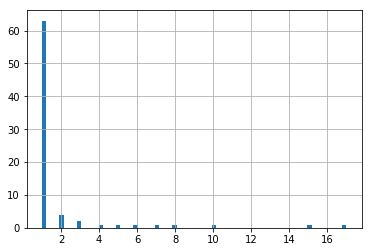

In [185]:
YearlySalary['Salary_numbers'].hist(bins=70)

In [186]:
moviemat = funding_data.pivot_table(index='SNo', columns='Scheme Opted', values='Yearly Salary')
moviemat.head()

Scheme Opted,Electronic Development Fund (EDF) Policy,Infrastructure Development Scheme,Multiplier Grants Scheme (MGS),NewGen Innovation and Entrepreneurship Development Centre (NewGen IEDC),Software Technology Park (STP) Scheme,Support for International Patent Protection in Electronics & Information Technology (SIP-EIT),Support for International Patent Protection in Electronics & Information Technology (SIP-EIT),1Crowd,50K Ventures,"Aakrit Vaish, Swapan Rajdev, Sushill Jiwarajka",...,"The quantum of SFAC Venture Capital Assistance will depend on the project cost, location and the promoter's status.",The quantum of loan from the IREDA shall be 70% of the project cost with minimum promoter‚Äôs contribution of 30%. IREDA may extend the loan upto 75% of the project cost.,"Times Internet, GVFL",Transamerica,"Varsha Rao, Surojit Chatterjee, Nirav Choksi & Others","Vellayan Subbiah, Jonathan Boutelle, Rajan Anandan,¬¨√ù Rahul Chawla, Salil Donde, Amit Ranjan, Govind Rajan & Others","Venture Catalysts, Alfa Capital, Green Shots Capital, Real Time Ventures","Vy Capital, SAIF Partners, Accel Partner, Bessemer Venture Partners",Yes Bank,undisclosed investors
SNo,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,130000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,343000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
YearlySalary.sort_values('Salary_numbers', ascending=False).head(10)

,Yearly Salary,Salary_numbers
Scheme Opted,,
EDF Policy,1644705,17
Software Technology Park (STP) Scheme,2484296,15
Support for International Patent Protection in Electronics & Information Technology (SIP-EIT),590260,10
M-SIPS,2340000,8
Multiplier Grants Scheme (MGS),1381890,7
Software Technology Park (STP) Scheme,5954166,6
Software Technology Park(STP),1889400,5
Multiplier Grants Scheme (MGS),380000,4
Atal Incubation Centres (AIC),1376666,3


In [188]:
STP_user_ratings = moviemat['Software Technology Park (STP) Scheme']

In [189]:
MGS_user_ratings = moviemat['Multiplier Grants Scheme (MGS)']

In [191]:
STP_user_ratings.head()

SNo
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Software Technology Park (STP) Scheme, dtype: float64

In [192]:
similar_to_STP = moviemat.corrwith(STP_user_ratings)


In [193]:
similar_to_STP.head()

Scheme Opted
\nElectronic Development Fund (EDF) Policy                                    NaN
\nInfrastructure Development Scheme                                           NaN
\nMultiplier Grants Scheme (MGS)\t                                            NaN
\nNewGen Innovation and Entrepreneurship Development Centre (NewGen IEDC)\t   NaN
\nSoftware Technology Park (STP) Scheme                                       NaN
dtype: float64

In [194]:
similar_to_MGS = moviemat.corrwith(MGS_user_ratings)

In [195]:
similar_to_MGS.head()

Scheme Opted
\nElectronic Development Fund (EDF) Policy                                    NaN
\nInfrastructure Development Scheme                                           NaN
\nMultiplier Grants Scheme (MGS)\t                                            NaN
\nNewGen Innovation and Entrepreneurship Development Centre (NewGen IEDC)\t   NaN
\nSoftware Technology Park (STP) Scheme                                       NaN
dtype: float64

In [196]:
corr_STP = pd.DataFrame(similar_to_STP, columns=['Correlation'])
corr_STP.dropna(inplace=True)

In [198]:
corr_STP.head()

,Correlation
Scheme Opted,
Software Technology Park (STP) Scheme,1.0


In [199]:
corr_STP.sort_values('Correlation', ascending=False).head(10)

,Correlation
Scheme Opted,
Software Technology Park (STP) Scheme,1.0


In [200]:
corr_STP = corr_STP.join(YearlySalary['Salary_numbers'], how='left', lsuffix='_left', rsuffix='_right')
corr_STP.head()

,Correlation,Salary_numbers
Scheme Opted,,
Software Technology Park (STP) Scheme,1.0,6


In [201]:
corr_STP[corr_STP['Salary_numbers']>5].sort_values('Correlation', ascending=False).head()


,Correlation,Salary_numbers
Scheme Opted,,
Software Technology Park (STP) Scheme,1.0,6


In [202]:
corr_MGS = pd.DataFrame(similar_to_MGS, columns=['Correlation'])
corr_MGS.head()

,Correlation
Scheme Opted,
\nElectronic Development Fund (EDF) Policy,NaN
\nInfrastructure Development Scheme,NaN
\nMultiplier Grants Scheme (MGS)\t,NaN
\nNewGen Innovation and Entrepreneurship Development Centre (NewGen IEDC)\t,NaN
\nSoftware Technology Park (STP) Scheme,NaN


In [203]:
corr_MGS = corr_MGS.join(YearlySalary['Salary_numbers'], how='left')
corr_MGS.head()


,Correlation,Salary_numbers
Scheme Opted,,
\nElectronic Development Fund (EDF) Policy,NaN,1
\nInfrastructure Development Scheme,NaN,1
\nMultiplier Grants Scheme (MGS)\t,NaN,1
\nNewGen Innovation and Entrepreneurship Development Centre (NewGen IEDC)\t,NaN,1
\nSoftware Technology Park (STP) Scheme,NaN,1


In [204]:
corr_MGS[corr_MGS['Salary_numbers']>4].sort_values('Correlation', ascending=False).head()

,Correlation,Salary_numbers
Scheme Opted,,
Multiplier Grants Scheme (MGS),1.0,7
EDF Policy,NaN,17
M-SIPS,NaN,8
Software Technology Park (STP) Scheme,NaN,6
Software Technology Park (STP) Scheme,NaN,15
